# Operações Morfológicas

Muitas vezes o resultado de uma segmentação por mascaramento não sai exatamente como queríamos.


Para imagens coloridas, o mais comum é trabalhar no espaço de cores **HSV - Hue, Saturation, Value**, onde o canal H (matiz) indica o valor da cor dentro dos círculos de cores básicas. No OpenCV, o canal Hue é representado através da metade do ângulo em graus no círculo de cores. Assim os valores variam de 0 a 180, o que cabe numa representação de 8 bits.

![](color_wheel.png)

**Exemplo:** vamos detectar apenas a cor violeta na imagem `cores.jpg`. Vamos assumir que a cor violeta encontra-se na faixa de 260º a 280º no círculo de cores  

In [2]:
import cv2
import matplotlib.pyplot as plt

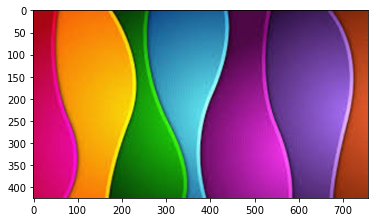

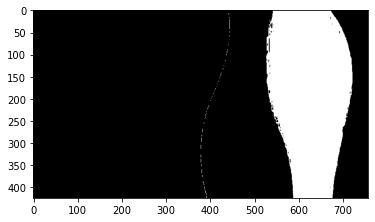

In [3]:
imgcor = cv2.imread("cores.jpg", cv2.IMREAD_COLOR)
plt.imshow(imgcor[:,:,::-1])
plt.show()
# Faz a conversão para o espaço HSV
img_hsv = cv2.cvtColor(imgcor, cv2.COLOR_BGR2HSV)
# Segmenta apenas a cor violeta
menor = (int(260/2), 50, 50)
maior = (int(280/2), 255, 255)
mask_violeta = cv2.inRange(img_hsv, menor, maior)j # pega só a mascara violeta!
plt.imshow(mask_violeta, cmap='gray')
plt.show()


### Pratique: 
Carregar a imagem `pingpong.jpg` e crie uma máscara indicando os pixels pertencentes à bolinha de pingue-pongue



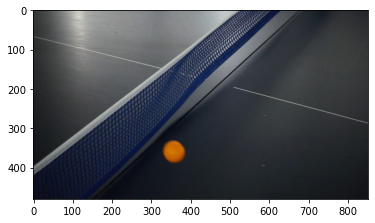

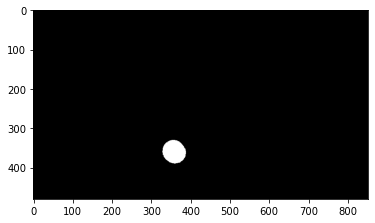

In [9]:
img = cv2.imread("pingpong.jpg", cv2.IMREAD_COLOR)
plt.imshow(img[:,:,::-1])
plt.show()

# convertendo para hsv
im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Segmenta apenas a cor laranja
menor = (int(0/2), 50, 50)
maior = (int(60/2), 255, 255)
mask_laranja = cv2.inRange(im_hsv, menor, maior) # pega só a mascara laranja!
plt.imshow(mask_laranja, cmap='gray')
plt.show()

 

# Operações morfológicas

Podemos reparar dos exemplos anteriores que muitas vezes as máscaras obtidas aparecem com *buracos* e/ou *ilhas*, de forma que:
- **Buracos** são pequenos segmentos de pixels pretos dentro de regiões de pixels brancos
- **Ilhas** são pequenos segmentos de pixels brancos dentro de regiões de pixels pretos.

Em geral, buracos e ilhas são regiões onde houve falha na segmentação da imagem. Para tratar imagens com esses problemas,
a área de processamento de imagens usa um conjunto de técnicas conhecidas como *Morfologia Matemática*. Elas surgiram no problema de análise da estrutura de cristais, mas obtiveram muito sucesso na área de processamento de imagens.

As operações de morfologia matemática se baseima na ideia de um elemento estruturante, que podemos pensar em uma pequena janela quadrada, com as dimensões de poucos pixels, que vasculham a imagem realizando uma de duas operações básicas:

1. **Erosão:**  ao encontrar um pixel preto dentro da janela, todos os pixels que estão dentro dessa janela ficam pretos

![](erodbin.gif)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm (exemplo com elemento estruturante 3x3)

![](erosion_j.png)

2. Dilatação: ao encontrar um pixel branco dentro da janela, todos os pixels que estão dentro dessa janela ficam brancos

![](diltbin.gif)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/dilate.htm (exemplo com elemento estruturante 3x3)

![](dilation_j.png)


A partir dessas duas operações, diversas outras são possíveis. Dessas, operações que encontram bastante utilidade prática em processamento de imagens é a de *abertura* e *fechamento*. 

### Abertura
Na operação de abertura são realizadas as operações de erosão e depois de dilatação. A ideia é eliminar pequenas ilhas, que seriam eliminadas na erosão, e depois restaurar as dimensões dos agrupamentos brancos restantes. Vamos ver um exemplo de uso da abertura na máscara em que identificamos os trechos de cor violeta     


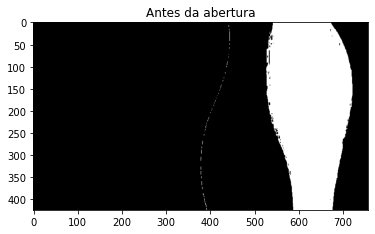

In [10]:
plt.imshow(mask_violeta, cmap='gray')
plt.title("Antes da abertura")
plt.show()

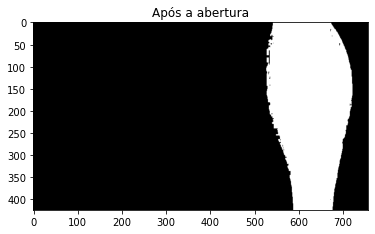

In [11]:
# Cria uma janela 3x3 como elemento estruturante
import numpy as np
elemento_estrut = np.ones([3,3])
# realiza a abertura
mask_violeta_abertura = cv2.morphologyEx(mask_violeta, cv2.MORPH_OPEN, elemento_estrut)
plt.imshow(mask_violeta_abertura, cmap='gray')
plt.title("Após a abertura")
plt.show()

### Fechamento
Na operação de fechamento são realizadas as operações de dilatação e depois de erosão. A ideia é fechar pequenos buracos, que seriam eliminadas na silatação, e depois restaurar as dimensões dos agrupamentos restantes. Vamos ver um exemplo de uso do fechamento na máscara em que identificamos os trechos de cor violeta

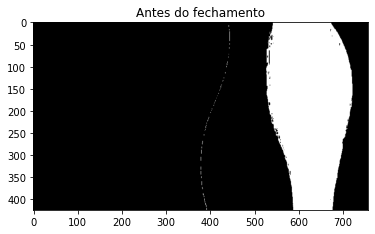

In [12]:
plt.imshow(mask_violeta, cmap='gray')
plt.title("Antes do fechamento")
plt.show()

Text(0.5, 1.0, 'Após o fechamento')

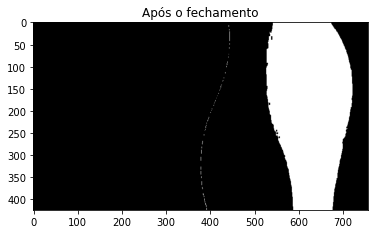

In [13]:
# Cria uma janela 3x3 como elemento estruturante
import numpy as np
elemento_estrut = np.ones([3,3])
# realiza a abertura
mask_violeta_fechamento = cv2.morphologyEx(mask_violeta, cv2.MORPH_CLOSE, elemento_estrut)
plt.imshow(mask_violeta_fechamento, cmap='gray')
plt.title("Após o fechamento")

### Pratique: 
1. Qual seria o resultado da aplicação da abertura seguida do fechamento na máscara usada acima?
1. Carregar a imagem `pingpong.jpg` e desenhar o contorno e o centro de massa da bolinha laranja. Imprima também a sua área na tela.

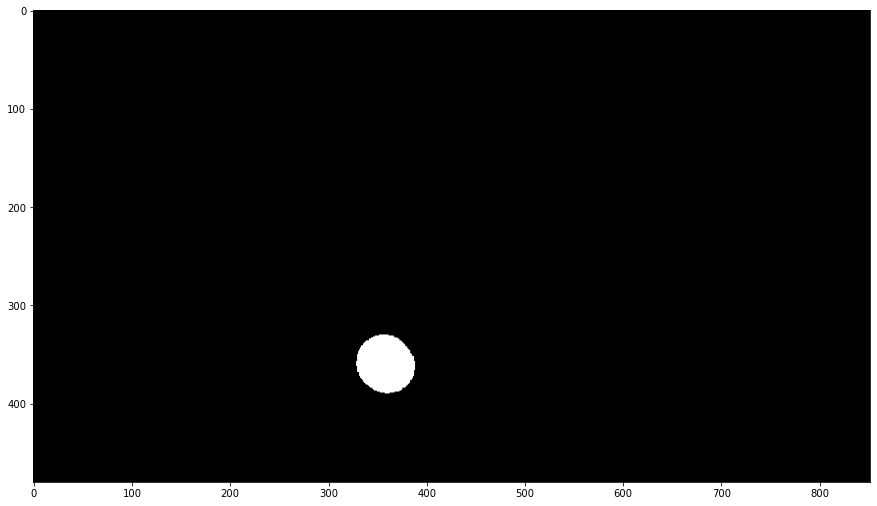

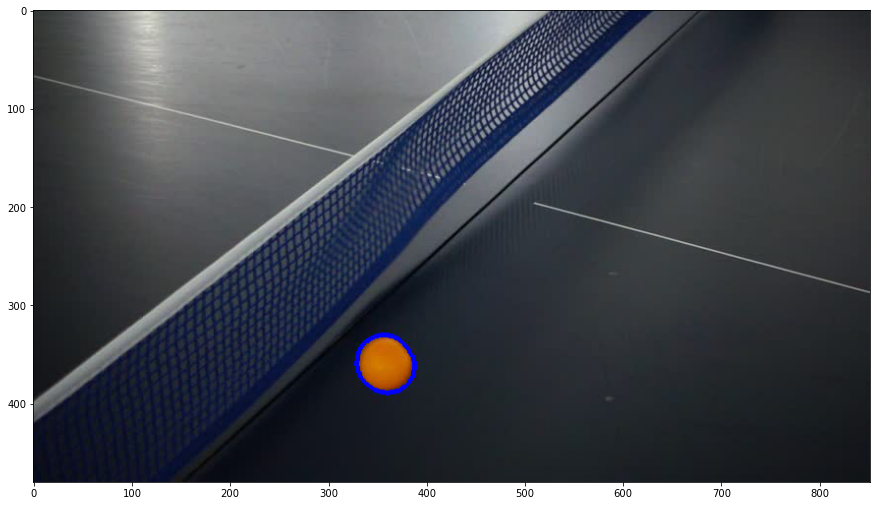

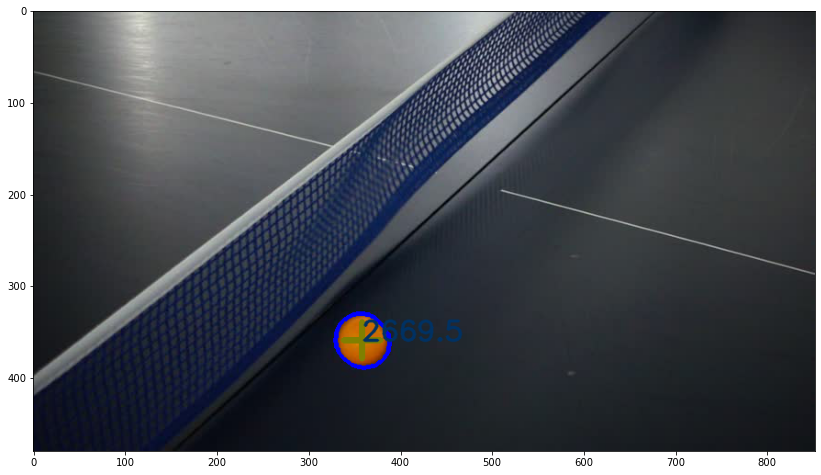

In [27]:
img = cv2.imread("pingpong.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# pegando uma mascara só com a cor laranja

cor_menor1 = np.array([0, 50, 50])
cor_maior1 = np.array([30, 255, 255])
mask_coke1 = cv2.inRange(img_hsv, cor_menor1, cor_maior1)

plt.figure(figsize=(15,10))
plt.imshow(mask_coke1, cmap='gray')
# plt.show()

# desenhando o cotorno
contornos, arvore = cv2.findContours(mask_coke1.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contornos_img = img_rgb.copy()
# contornos_img = coke_rgb.copy()
cv2.drawContours(contornos_img, contornos, -1, [0, 0, 255], 3);
plt.figure(figsize=(15,10))
plt.imshow(contornos_img)

# calculando o centro de massa e a área
def center_of_contour(contorno):
    """ Retorna uma tupla (cx, cy) que desenha o centro do contorno"""
    M = cv2.moments(contorno)
    # Usando a expressão do centróide definida em: https://en.wikipedia.org/wiki/Image_moment
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (int(cX), int(cY))
    
def crosshair(img, point, size, color):
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,5)
    cv2.line(img,(x,y - size),(x, y + size),color,5)
    
font = cv2.FONT_HERSHEY_SIMPLEX

def texto(img, a, p):
    """Escreve na img RGB dada a string a na posição definida pela tupla p"""
    cv2.putText(img, str(a), p, font,1,(0,50,100),2,cv2.LINE_AA)


for c in contornos:
    a = cv2.contourArea(c) # área
    p = center_of_contour(c) # centro de massa
    crosshair(contornos_img, p, 20, (128,128,0))
    texto(contornos_img, np.round(a,2),p)
    
plt.figure(figsize=(14,10))

plt.imshow(contornos_img); 
plt.show()
